In [169]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving faces.zip to faces.zip
User uploaded file "faces.zip" with length 13865701 bytes


In [170]:
#unzip file 
from zipfile import ZipFile
file_name = "faces.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [241]:
from google.colab.patches import cv2_imshow
import cv2
import os
from os import listdir
import glob

In [226]:
cd faces/

/content/faces


In [227]:
img = cv2.imread("000015.jpg")

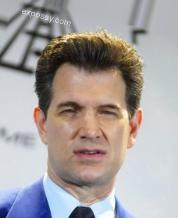

In [228]:
cv2_imshow(img)

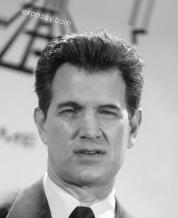

In [234]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

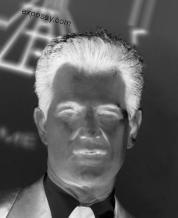

In [235]:
img_invert = cv2.bitwise_not(img_gray)
cv2_imshow(img_invert)

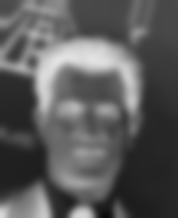

In [236]:
img_smoothing = cv2.GaussianBlur(img_invert, (21, 21),sigmaX=0, sigmaY=0)
cv2_imshow(img_smoothing)

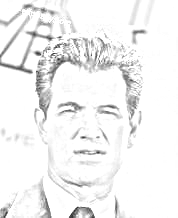

In [237]:
final_img = cv2.divide(img_gray, 255 - img_smoothing, scale=256)
cv2_imshow(final_img)

In [245]:
cd ..

/content


In [246]:
directory = r'faces/'

In [248]:
filenames = [img for img in glob.glob("faces/*.jpg")]
filenames.sort() # ADD THIS LINE

#Note: I replaced the original images with the sketch images
for x in filenames:
    img = cv2.imread(x)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_invert = cv2.bitwise_not(img_gray)
    img_smoothing = cv2.GaussianBlur(img_invert, (21, 21),sigmaX=0, sigmaY=0)
    final_img = dodgeV2(img_gray, img_smoothing)
    cv2.imwrite(x, final_img)

